NAME : Danny

SURNAME : D'Agostino

NUMBER : 1247958

\vspace{5mm}

\vspace{5mm}

\vspace{5mm}

\vspace{5mm}

In [7]:
%matplotlib nbagg
from mlxtend.plotting import plot_decision_regions
from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from matplotlib import cm
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'weight' : 'bold'})
rc('text', usetex=True)
rc('text', usetex=True)

\vspace{5mm}

Preprocessing data : 

In [4]:
pr = np.arange(0,360,5)
Y = []
X = []
Xm = []
Xp = []
for k in pr:
    img_data1 = np.asarray(Image.open('/home/danny/Università/Data Science/AI and Machine Learning/Machine Learning/Homework1/class1/obj96__'+str(k)+'.png'))
    img_data2 = np.asarray(Image.open('/home/danny/Università/Data Science/AI and Machine Learning/Machine Learning/Homework1/marlboro/obj46__'+str(k)+'.png'))
    img_data3 = np.asarray(Image.open('/home/danny/Università/Data Science/AI and Machine Learning/Machine Learning/Homework1/class3/obj65__'+str(k)+'.png'))
    if k==90:
        im1 = img_data1
        im2 = img_data2
        im3 = img_data3
    x1 = img_data1.ravel() # parliament cigarettes
    x2 = img_data2.ravel() # marlboro cigarettes
    x3 = img_data3.ravel() # johnson & johnson
    X.append(x1)
    Xm.append(x1)
    Y.append(0)   # class parliament
    X.append(x2)
    Xp.append(x2)
    Y.append(1)   # class marlboro
    X.append(x3)
    Y.append(2)  # class johson&johnson
X = np.array(X,dtype = 'float32')
Xm = np.array(Xm,dtype = 'float32')
Xp = np.array(Xp,dtype = 'float32')
print X.shape
Y = np.array(Y)
Labels  = ['Parliament','Marlboro','Johnson&johnson']

(144, 49152)


\vspace{5mm}


Visualize the first two classes

<IPython.core.display.Javascript object>


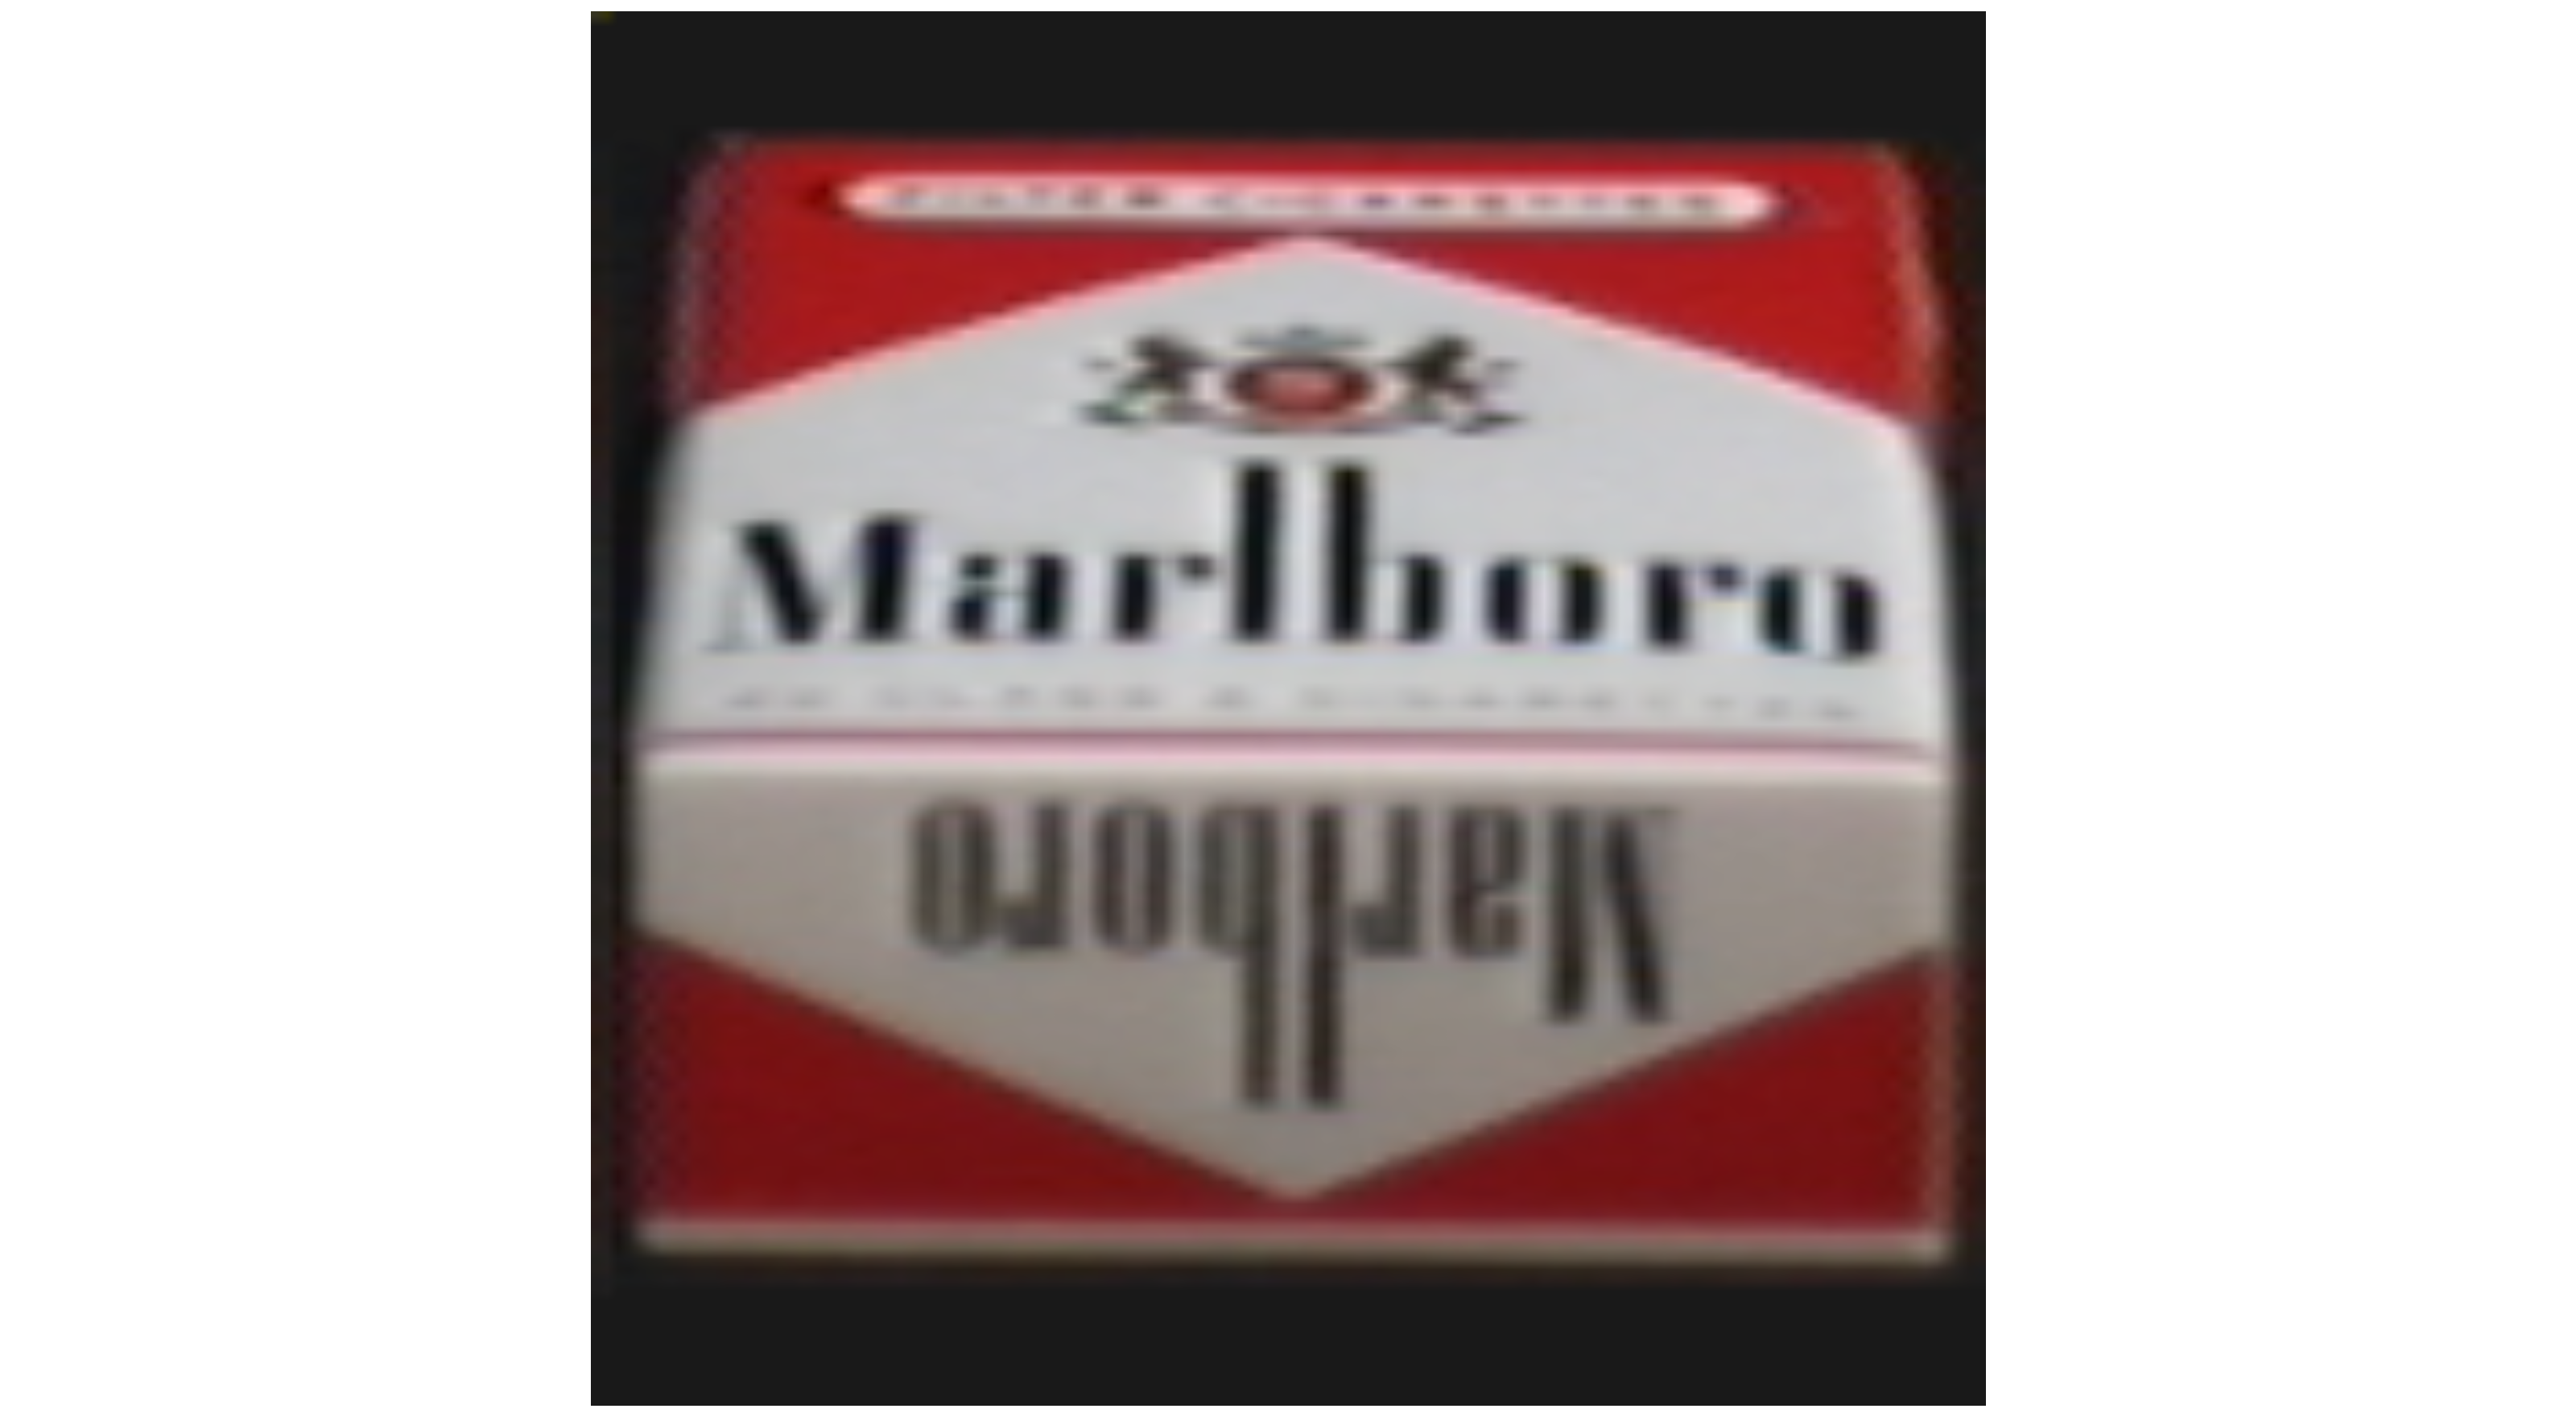

In [31]:
fig = plt.figure(figsize=(40,22))
ax = fig.add_subplot(111)
ax.set_xticks([]) 
ax.set_yticks([]) 
iview = plt.imshow(im2)
plt.tight_layout() 
plt.savefig('marlboro_or.pdf')

Parliament cigarettes 

<IPython.core.display.Javascript object>


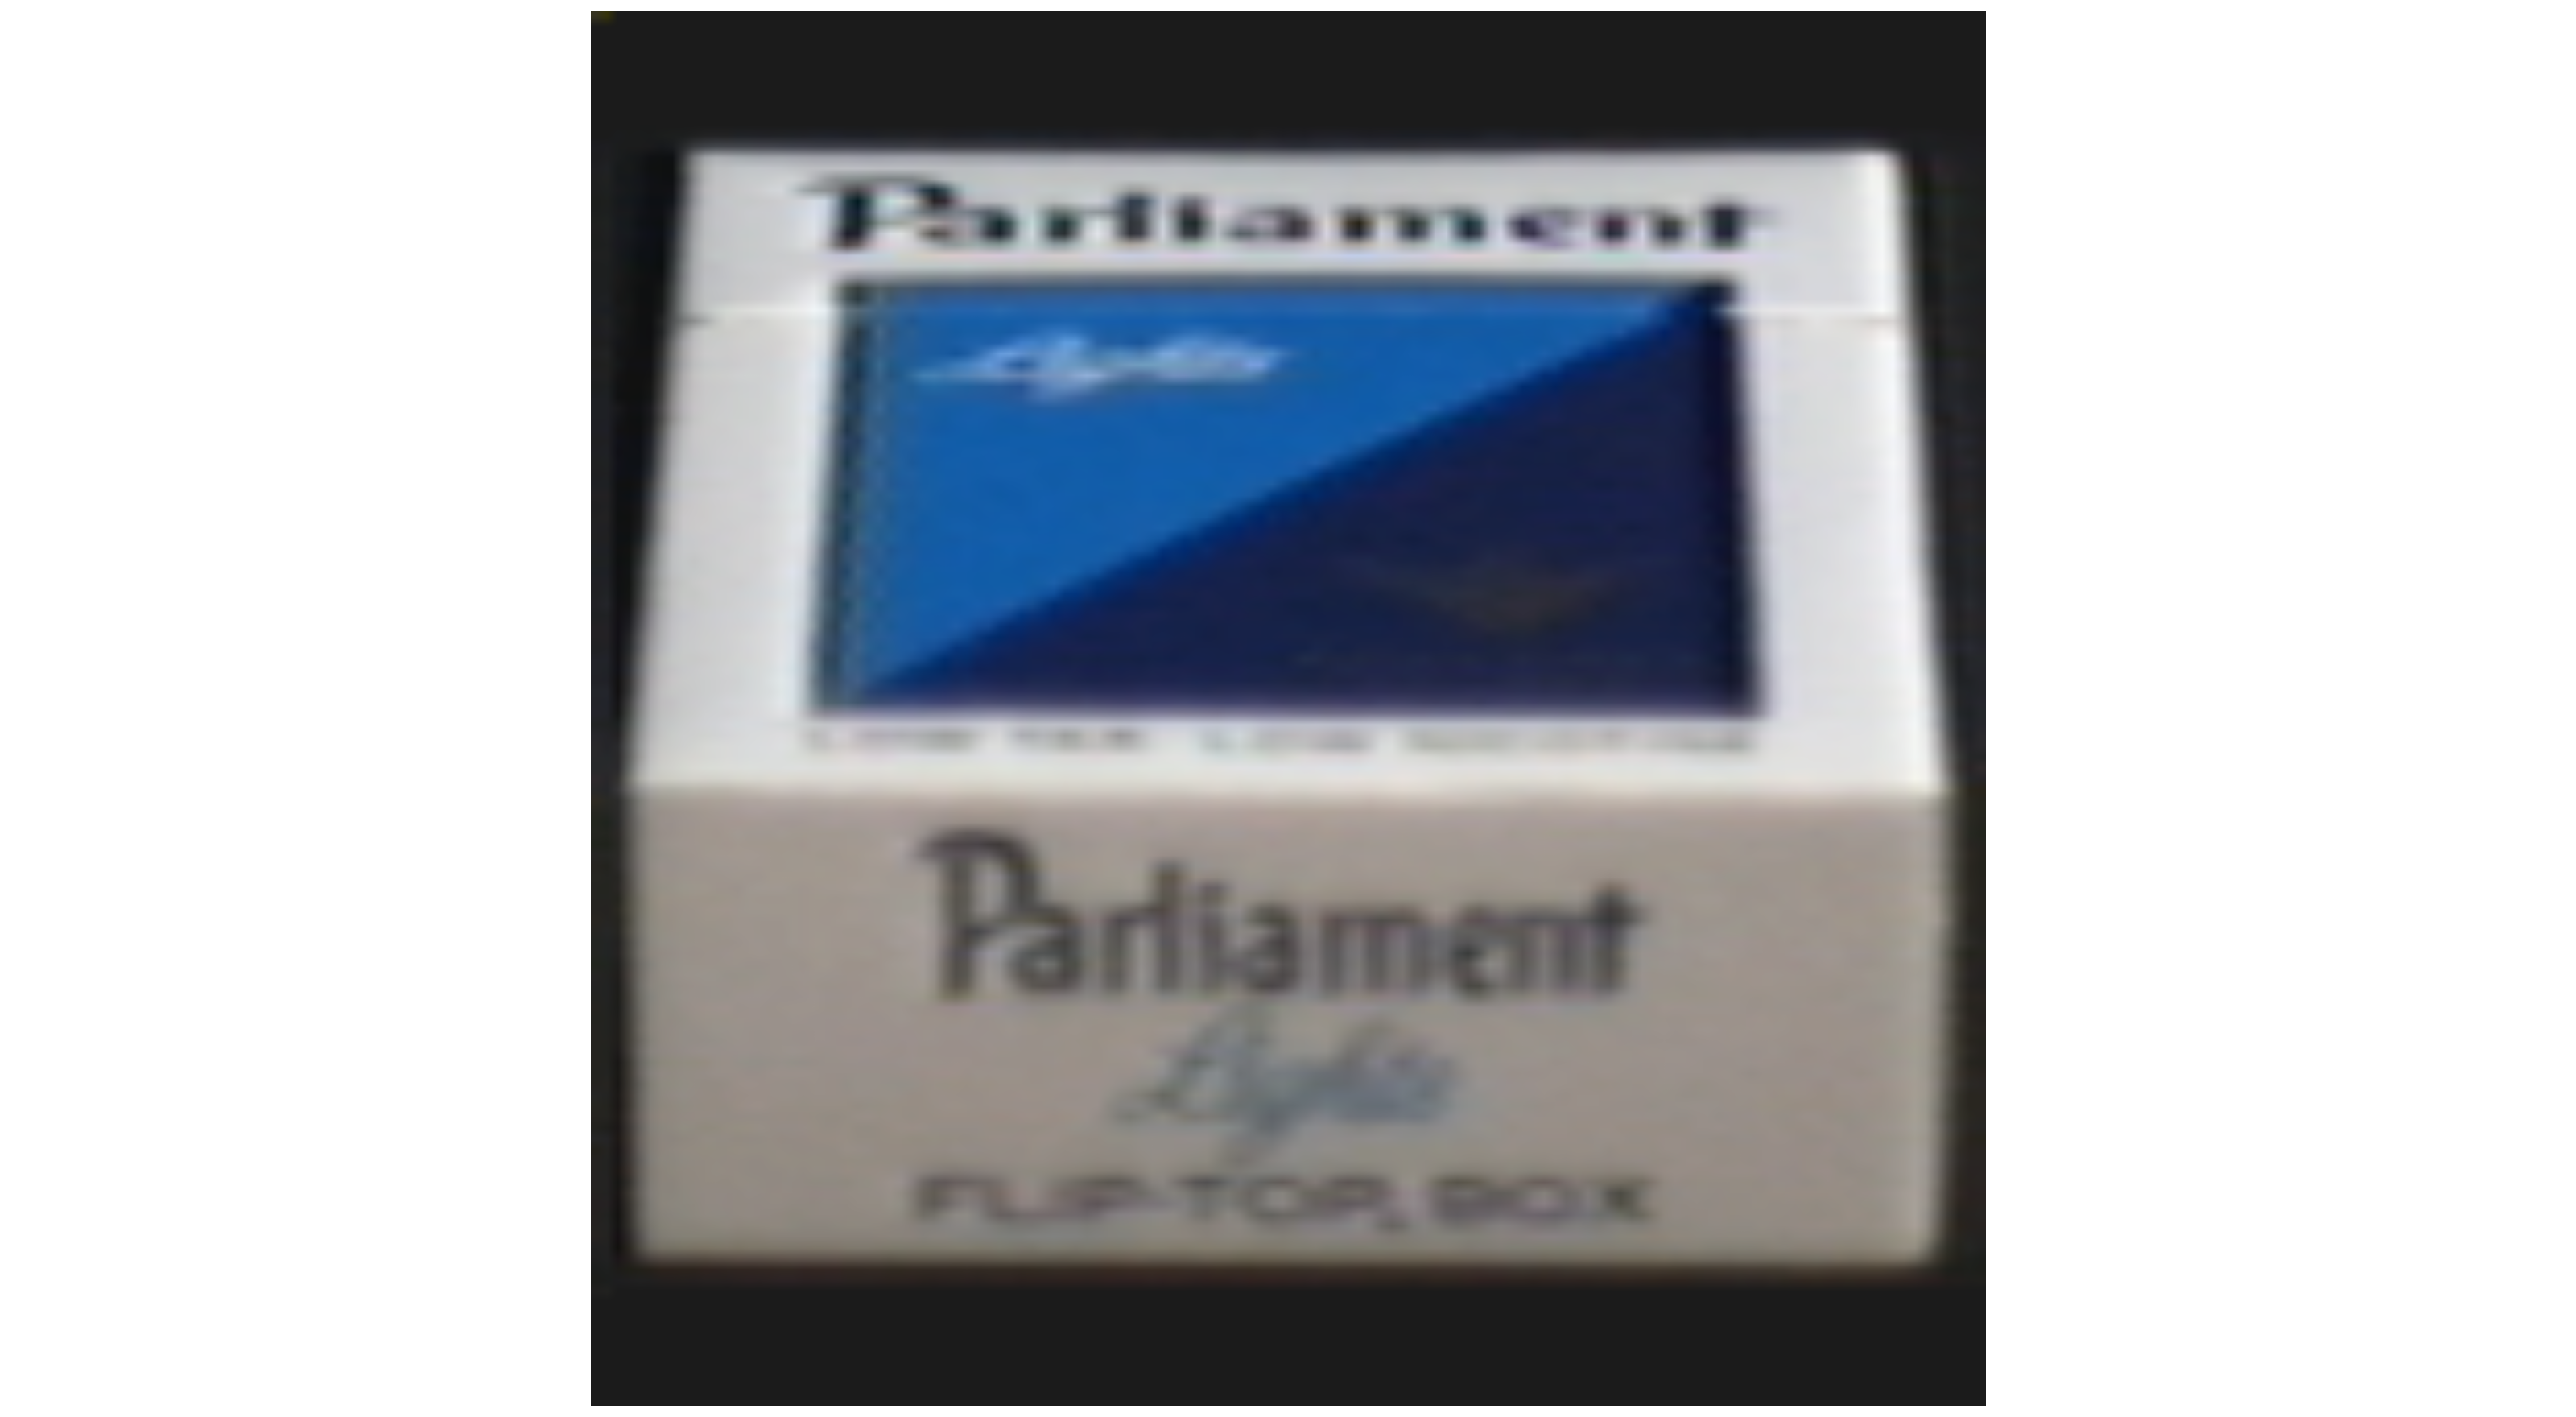

In [29]:
fig = plt.figure(figsize=(40,22))
ax = fig.add_subplot(111)
ax.set_xticks([]) 
ax.set_yticks([]) 
iview = plt.imshow(im1)
plt.tight_layout() 
plt.savefig('parliament_or.pdf')

\vspace{5mm}

Standardize data :


In [ ]:
X_stan = preprocessing.scale(X)

\vspace{5mm}

We compute PCA on the standardized dataset : 

In [7]:
pca = PCA()
X_t = pca.fit_transform(X_stan)
PC1 = X_t[:,0]
PC2 = X_t[:,1]
x = plt.scatter(PC1, PC2,c = colormap[Y])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Plot of the First and Second Principal Components')
sns.set(style="darkgrid",color_codes=True)
plt.show()

\vspace{5mm}

And we'll plot the results : 
Note : ( green : parliament cigarettes ), ( white : marlboro red cigarettes ), ( red :  johnson&johnson ) i could not plot the legend sorry. 

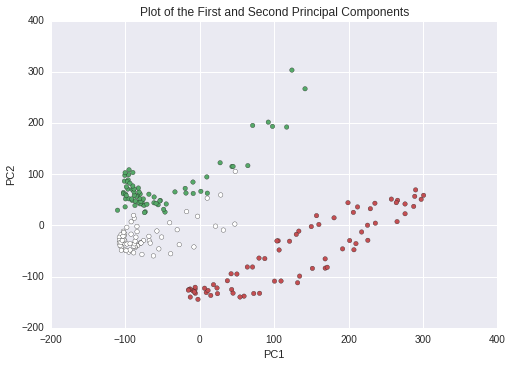

In [18]:
colormap = np.array(['g', 'w', 'r'])
PC1 = X_t[:,0]
PC2 = X_t[:,1]
x = plt.scatter(PC1, PC2,c = colormap[Y])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Plot of the First and Second Principal Components')
sns.set(style="darkgrid",color_codes=True)
plt.show()

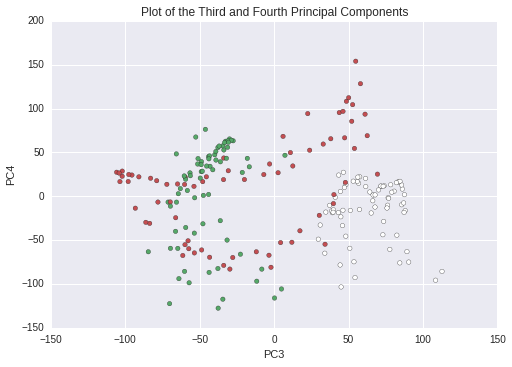

In [10]:
PC3 = X_t[:,2]
PC4 = X_t[:,3]
plt.scatter(PC3, PC4,c = colormap[Y])
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Plot of the Third and Fourth Principal Components')
sns.set(style="darkgrid")
plt.show()

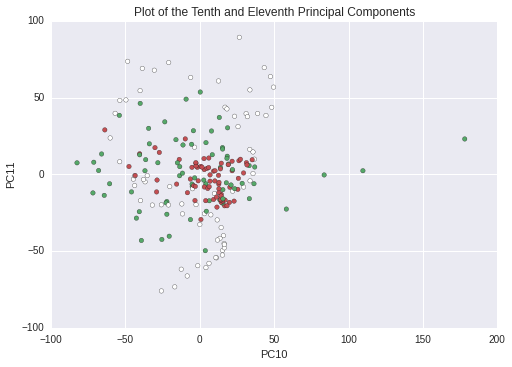

In [11]:
PC10 = X_t[:,9]
PC11 = X_t[:,10]
plt.scatter(PC10, PC11,c = colormap[Y])
plt.xlabel('PC10')
plt.ylabel('PC11')
plt.title('Plot of the Tenth and Eleventh Principal Components')
plt.legend(loc='upper right')
sns.set(style="darkgrid")
plt.show()

\vspace{5mm}

Principal component analysis is tecniques that seeks a r-dimensional basis that best captures the variance in the data. The direction with the largest projected
variance ( or the one that minimizes the mean squared error ) is called the first principal component. The orthogonal direction that captures the second largest projected variance is called the second principal component, and
so on. As we can see the first plot show the first and the second principal component, and it seems really clear that in this case the three label in our dataset are divided from each other; more clearly, even if we don't put different colors for every label we can see that there are three clusters in our dataset. This behaviour becomes less clear if we take the third and the fourth principal component and really less clear if we take the tenth and the eleventh where we cannot distinguish any different pattern from the three classes because most of that it is noise.

\vspace{5mm}

A really simple way for choose the dimensionality is to compute the fraction of the total variance captured by the first r principal components, and choose the minimum dimensionality for which captures at least µ (that is a threshold for example 0.9) of the total variance.

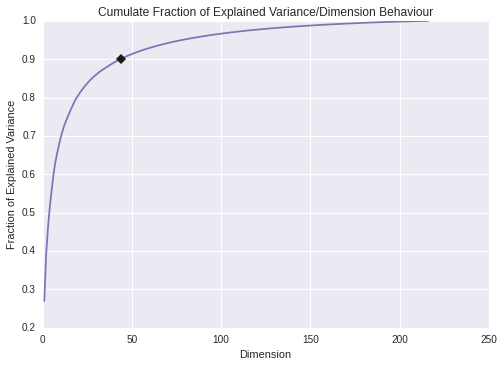

In [12]:
vard = pca.explained_variance_ratio_
x = np.arange(1,217)
t = 0
frv= []
markers_on = []
i = 0
for k in vard:
    i += 1
    t = t + k
    frv.append(t/sum(vard)) 
    if t/sum(vard) > 0.9 and len(markers_on)<1:
        markers_on.append(t/sum(vard))
        markers_on.append(i)
plt.plot(x,frv,color='m')
plt.plot(markers_on[1],markers_on[0],color='k',marker = 'D')
plt.xlabel('Dimension')
plt.ylabel('Fraction of Explained Variance')
plt.title('Cumulate Fraction of Explained Variance/Dimension Behaviour')
sns.set_style("white")
plt.show()

From the figure we can see that if we take the first 44 principal components we take more or less the 90% of the variance of the whole dataset.

\vspace{5mm}

The naive Bayes approach is based on the important assumption that all the features are independent, for this reason we can decompose the likelihood function in the product of the probabilities for every dimension: $$\Pr \left (x\mid y_{k}\right ) = \Pr \left ( x_{1},x_{2},...,x_{d}\mid y_{k} \right )= \prod_{j=1}^{d}\Pr \left ( x_{j}\mid y_{k} \right )$$
Infact under this assumptions obviusly the covariance matrix is:
$$\Sigma _{i}=\begin{pmatrix}
 \sigma_{i1}^{2}& 0 &\cdots &0 \\ 
0 & \sigma_{i2}^{2}  &\cdots   &0 \\ 
\vdots  &\vdots   &\ddots   &\vdots  \\ 
0 & 0 & \cdots  & \sigma_{id}^{2} 
\end{pmatrix}$$
This means that:
$$\det \left ( \Sigma _{i} \right ) = \prod_{j=1}^{d}\sigma _{ij}^{2}$$
and:
$$\Sigma^{-1} _{i}=\begin{pmatrix}
 1/\sigma_{i1}^{2}& 0 &\cdots &0 \\ 
0 & 1/\sigma_{i2}^{2}  &\cdots   &0 \\ 
\vdots  &\vdots   &\ddots   &\vdots  \\ 
0 & 0 & \cdots  & 1/\sigma_{id}^{2} 
\end{pmatrix}$$
This means that the square of the Mahalanobis distance is the squared normalized euclidean distance:
$$\left ( x-\mu _{i} \right )\Sigma _{i}^{-1}\left( x-\mu _{i} \right)= \sum_{j=1}^{d}\frac{\left ( x_{j}-\mu _{ij} \right )}{\sigma _{ij}^{2}}$$
if we put this on the density function :
$$\Pr \left ( x \mid y_{k}\right )=\frac{1}{\left ( \sqrt{2\pi } \right )^{d}\sqrt{\prod_{j=1}^{d}\sigma _{ij}^{2}}}\exp \left \{ -\sum_{j=1}^{d}\frac{\left ( x_{j}-\mu _{ij} \right )}{\sigma _{ij}^{2}} \right \}=\prod_{j=1}^{d}\left ( \frac{1}{\left (\sqrt{2\pi }  \right )\sigma_{ij}}\exp\left (-\frac{\left ( x_{j}-\mu_{ij} \right )^{2}}{2\sigma_{ij}^{2}}\right ) \right )=\prod_{j=1}^{d}\Pr \left ( x_{j} \mid y_{k}\right )$$

The naive Bayes it is a very simple method for classify data : it estimates the prior probability and mean for each class.
After it computes the variance for each attribute and finally returns the class with the maximum posterior probability as a product of the likelihood for each
dimension and the class prior probability.

\vspace{5mm}

We'll use 10-fold for cross-validation and we begin to train the classifier on the full dataset

In [13]:
kf1 = KFold(len(Y), n_folds=10, shuffle = True)
gnb = GaussianNB()

\vspace{5mm}

We compute the training and test error on the full dataset :

In [1]:
def nbc(X,Y,ax,ay):
    Labels  = ['Parliament','Marlboro','Johnson&Johnson']
    l_test = []
    l_train = []
    for train_index, test_index in kf1:
        start = timer()
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        gnb.fit(X_train,y_train)
        y_pred_test = gnb.predict(X_test)
        y_pred_train = gnb.predict(X_train)
        l_test.append(gnb.score(X_test, y_test))
        l_train.append(gnb.score(X_train, y_train))
    end = timer()
    t = end - start
    if len(X[0])!=2:
        return 'test accuracy '+str(np.mean(l_test)),'training accuracy '+str(np.mean(l_train)),t
    else:
        plot_decision_regions(X,Y, clf=gnb, res=0.5,cmap=cm.BuGn,legend=0)
        for k in Labels:
            plt.scatter(X[:,0], X[:,1],cmap=cm.BuGn,c = Y)
        plt.xlabel(ax)
        plt.ylabel(ay)
        plt.title('Naive Bayes Decision Regions')
        #plt.legend()
        sns.set_style()
        plt.show()       
        return 'test accuracy '+str(np.mean(l_test)),'training accuracy '+str(np.mean(l_train)),'time '+str(t)

In [16]:
print(nbc(X_stan,Y,'k','m'))

('the test error is 0.958441558442', 'the training error is 0.990740153317', 2.5342190265655518)


We compute the training and test error on the first two principal components and we plot the decision regions, where now the classes colours are : ( white : parliament cigarettes ), ( light green : marlboro red cigarettes ), ( dark green :  johnson&johnson )


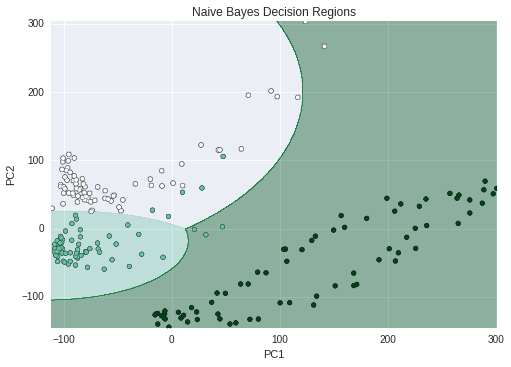

('the test accuracy is 0.944588744589', 'the training accuracy is 0.95421887391', 'time 0.00294208526611')


In [19]:
m1 = np.column_stack((PC1, PC2))
print(nbc(m1,Y,'PC1','PC2'))

\vspace{5mm}

Now with the third and the fourth:

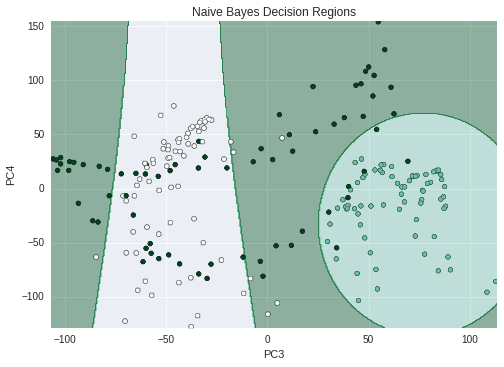

('the test accuracy is 0.818614718615', 'the training accuracy is 0.825093840867', 'time 0.00301194190979')


In [20]:
m2 = np.column_stack((PC3, PC4))
print(nbc(m2,Y,'PC3','PC4'))

\vspace{5mm}

Finally on the tenth and eleventh:

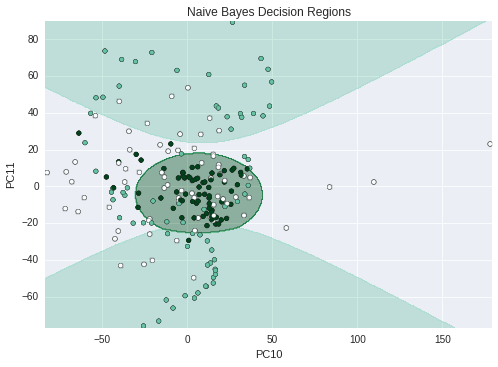

('the test accuracy is 0.602380952381', 'the training accuracy is 0.621408934708', 'time 0.00284004211426')


In [21]:
m3 = np.column_stack((PC10, PC11))
print(nbc(m3,Y,'PC10', 'PC11'))

\vspace{5mm}

In this case we can see that PCA can be a really powerfull tool for preprocess the data, infact we have that the test error computed on the whole dataset and on the first two principal component is really similar but in the second case computed in less time. As we expect we have poor performance on the other principal components.